In [1]:
import os
import dask.dataframe as dd
import pandas as pd
# import scipy.io as sio
import numpy as np
from dask import delayed
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
# import mne

# Read from Parquet

In [2]:
# select only the columns that you plan to use
%timeit
df = dd.read_parquet('/Volumes/Mosadoluwa 2TB/Neurovista/Pat1Train.parquet',engine='pyarrow')

# Data Description

In [3]:
df.head()

,study,segment,class,ch0,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,ch9,ch10,ch11,ch12,ch13,ch14,ch15,block_id
index,,,,,,,,,,,,,,,,,,,,
0,Pat1Train,1009,0,-83.48828,-106.718506,-37.229004,141.69824,-45.487060,17.825684,-40.854492,7.418945,-8.358887,-17.422852,0.637695,53.141113,5.136230,23.801025,38.773193,47.031494,169
1,Pat1Train,1009,0,-89.53076,-108.665530,-39.176025,142.70532,-51.462646,19.839844,-42.868652,6.411621,-8.358887,-15.408691,7.620117,57.169434,4.128906,24.808105,44.748780,50.052734,169
2,Pat1Train,1009,0,-90.53784,-110.679690,-47.232666,144.65234,-51.462646,18.832764,-42.868652,9.433350,-11.380127,-15.408691,8.627686,56.162354,9.164795,25.815430,46.762940,51.059814,169
3,Pat1Train,1009,0,-88.52368,-111.686770,-53.208252,149.68799,-50.455566,21.854004,-41.861572,15.408691,-15.408691,-18.429932,8.627686,59.116455,10.104736,18.765625,43.741700,50.052734,169
4,Pat1Train,1009,0,-85.50244,-108.665530,-58.176514,152.70923,-49.448486,20.846924,-37.833252,20.376953,-23.398193,-21.451172,14.603027,64.152100,7.150391,8.761963,45.755860,52.066895,169


In [4]:
df.dtypes

study        object
segment       int64
class         int64
ch0         float64
ch1         float64
ch2         float64
ch3         float64
ch4         float64
ch5         float64
ch6         float64
ch7         float64
ch8         float64
ch9         float64
ch10        float64
ch11        float64
ch12        float64
ch13        float64
ch14        float64
ch15        float64
block_id      int64
dtype: object

In [5]:
print(f'There are {int(df.size.compute() / df.shape[1])} rows and {df.shape[1]} columns')


There are 197604809 rows and 20 columns


In [6]:
df['class'].value_counts().compute()

0    136529809
1     61075000
Name: class, dtype: int64

## Preictal

In [7]:
pat1_preictal_description = df[df['class'] == 1].iloc[:, 3:-1].describe().compute()

In [8]:
pat1_preictal_description.head()


,ch0,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,ch9,ch10,ch11,ch12,ch13,ch14,ch15
count,6.107500e+07,6.107500e+07,6.107500e+07,6.107500e+07,6.107500e+07,6.107500e+07,6.107500e+07,6.107500e+07,6.107500e+07,6.107500e+07,6.107500e+07,6.107500e+07,6.107500e+07,6.107500e+07,6.107500e+07,6.107500e+07
mean,3.638221e-03,2.461372e-02,7.211275e-02,-3.440142e-02,4.797553e-02,-5.515550e-02,2.605473e-03,-1.084710e-01,-4.880698e-02,-1.105741e-01,-1.067725e-01,1.219986e-01,2.037599e-01,1.419766e-01,1.269083e-01,1.299538e-02
std,2.766804e+01,3.028344e+01,3.167338e+01,5.313039e+01,3.303541e+01,2.822801e+01,3.247108e+01,3.275417e+01,2.677464e+01,3.749299e+01,3.455712e+01,4.527587e+01,5.101323e+01,4.949785e+01,4.183653e+01,2.767179e+01
min,-4.283849e+02,-3.357992e+02,-7.877165e+02,-6.375920e+02,-1.949435e+03,-9.691951e+02,-7.605922e+02,-7.103716e+02,-4.981429e+02,-1.967562e+03,-5.939513e+02,-8.895675e+02,-1.803406e+03,-2.102782e+03,-9.072252e+02,-4.303319e+02
25%,3.369141e-02,-1.107910e+00,3.369141e-02,-2.316406e+00,3.369141e-02,3.369141e-02,-1.005859e-01,-5.708008e-01,3.369141e-02,-3.369141e-02,-3.022461e-01,-9.062500e-01,-3.022461e-01,3.369141e-02,-4.365234e-01,-3.691406e-01


In [9]:
mins = pat1_preictal_description.iloc[3]
maxes = pat1_preictal_description.iloc[7]
means = pat1_preictal_description.iloc[1]
std = pat1_preictal_description.iloc[2]

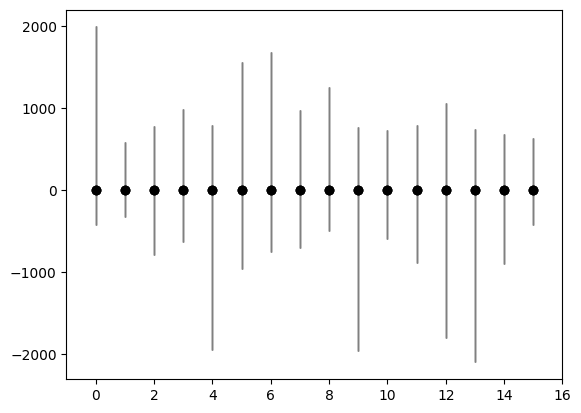

In [12]:
# create stacked errorbars:
numOfCh = pat1_preictal_description.shape[1]
plt.errorbar(np.arange(numOfCh), means, std, fmt='ok', lw=3)
plt.errorbar(np.arange(numOfCh), means, [means - mins, maxes - means],
             fmt='.k', ecolor='gray', lw=1)
plt.xlim(-1, numOfCh)
plt.show()

## Interictal

In [13]:
pat1_interictal_description = df[df['class'] == 0].iloc[:, 3:-1].describe().compute()


In [ ]:
pat1_interictal_description

In [ ]:
mins = pat1_interictal_description.iloc[3]
maxes = pat1_interictal_description.iloc[7]
means = pat1_interictal_description.iloc[1]
std = pat1_interictal_description.iloc[2]

In [ ]:
# create stacked errorbars:
numOfCh = pat1_interictal_description.shape[1]
plt.errorbar(np.arange(numOfCh), means, std, fmt='ok', lw=3)
plt.errorbar(np.arange(numOfCh), means, [means - mins, maxes - means],
             fmt='.k', ecolor='gray', lw=1)
plt.xlim(-1, numOfCh)
plt.show()

# Analyze data by 1 hour blocks = every 6th segments
Preictal training files after segment 150 or 25 hours can be viewed as extra files.

In [ ]:
pdf_interictal_block1 = df[df['block_id'] == 1].compute()

In [ ]:
pdf_interictal_block1['segment'].value_counts()

## Plot the first 10 minutes of block 1

In [ ]:
pdf_seg1_block1 = pdf_interictal_block1.loc[(
    pdf_interictal_block1['segment'] == 1)].iloc[:, 3:-1]
pdf_seg1_block1.shape

In [ ]:
pdf_seg1_block1.plot(legend=False)

## Plot the entire one hour of block 1